<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import sys

In [2]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds
from zipfile import ZipFile
import os
import numpy as np
import matplotlib.pyplot as plt
import bfseg.models.fast_scnn
import bfseg.data.hive.office_rumlang_validation_labeled
import bfseg.data.hive.bfseg_validation_labeled
from bfseg.utils.utils import load_gdrive_file
#from bfseg.settings import TMPDIR
TMPDIR = "/home/matthias/data/rss_2021_data/tmp/"
MASKPATH = "/home/matthias/data/rss_2021_data/mask.png"

Segmentation Models: using `tf.keras` framework.


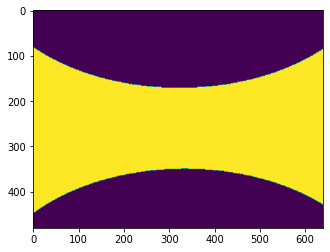

In [3]:
# Load mask
mask = plt.imread(MASKPATH)
ax = plt.subplot()
ax.imshow(mask)
mask_filtered = np.nonzero(mask)
test = mask[mask_filtered]

## Untrained

In [4]:
model0 = tf.keras.models.load_model('/home/matthias/data/rss_2021_data/xavier_models/18_full/model_epoch_initial.h5')

In [5]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='RUMLANG').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model0(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.27610642>

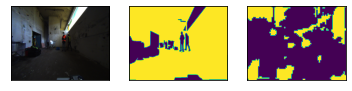

In [8]:
ds_rumlang = tfds.load('office_rumlang_validation_labeled', split='RUMLANG')
for entry in ds_rumlang.take(1):
    ax1 = plt.subplot(1,3,1)
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    plt.imshow(entry['image'])
    ax2 = plt.subplot(1,3,2)
    ax2.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    plt.imshow(entry['label'])
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model0(a)
    pred = tf.argmax(b[1], axis=-1)
    ax3 = plt.subplot(1,3,3)
    ax3.get_yaxis().set_visible(False)
    ax3.get_xaxis().set_visible(False)
    plt.imshow(pred[0,:,:])
    

## Full (standard localization)

In [62]:
model1 = tf.keras.models.load_model('/home/matthias/data/rss_2021_data/xavier_models/18_full/model_epoch_12.h5')

In [63]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='RUMLANG').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model1(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.505292>

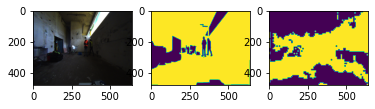

In [56]:
ds_rumlang = tfds.load('office_rumlang_validation_labeled', split='RUMLANG')
for entry in ds_rumlang.take(1):
    plt.subplot(1,3,1)
    plt.imshow(entry['image'])
    plt.subplot(1,3,2)
    plt.imshow(entry['label'])
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model1(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])
    

## Full Dyn (Realsense localization)

In [57]:
model2 = tf.keras.models.load_model('/home/matthias/data/rss_2021_data/xavier_models/19_dyn_preliminary/model_epoch_20.h5')

In [58]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='RUMLANG').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5466626>

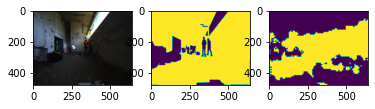

In [92]:
ds_rumlang = tfds.load('office_rumlang_validation_labeled', split='RUMLANG')
for entry in ds_rumlang.take(1):
    plt.subplot(1,3,1)
    plt.imshow(entry['image'])
    plt.subplot(1,3,2)
    plt.imshow(entry['label'])
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])
    